# RDKit Basic Tutorial

Assets:

1. 2D molecule: `input.mol`
2. 2D molecule sdf: `5ht3ligs.sdf`
3. 3D molecule: `1t3r_lig.mol`

## Read and Write Molecules

### Read Molecules

<class 'rdkit.Chem.rdchem.Mol'>


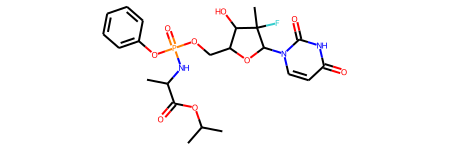

In [1]:
# Example 1: read SMILES
from rdkit import Chem
from rdkit.Chem import AllChem

smi = "CC(C)OC(=O)C(C)NP(=O)(OCC1C(C(C(O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3"
mol = Chem.MolFromSmiles(smi)
print(type(mol))
mol

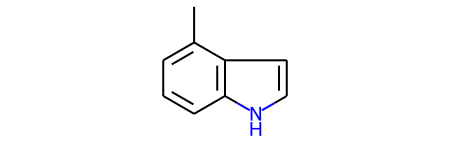

In [2]:
# Example 2: read mol file
mol = Chem.MolFromMolFile("data/input.mol")
mol

In [3]:
# Example 3: read sdf file
mols_suppl = Chem.SDMolSupplier("data/5ht3ligs.sdf")
type(mols_suppl)

rdkit.Chem.rdmolfiles.SDMolSupplier

In [4]:
# `mols_suppl` can be treat as a list contains mols
mol_0 = mols_suppl[0]
print(type(mol_0))
for mol in mols_suppl:
    print(type(mol))

<class 'rdkit.Chem.rdchem.Mol'>
<class 'rdkit.Chem.rdchem.Mol'>
<class 'rdkit.Chem.rdchem.Mol'>
<class 'rdkit.Chem.rdchem.Mol'>
<class 'rdkit.Chem.rdchem.Mol'>


smi: NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)O


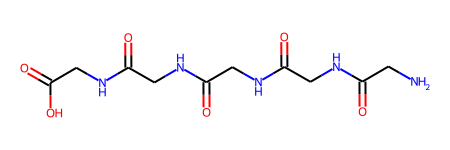

In [5]:
# Example 4: read polypeptide string
seq = "GGGGG"
mol = Chem.MolFromSequence(seq)
smi = Chem.MolToSmiles(mol)
print(f"smi: {smi}")
mol

## Write Molecules

`Smiles`, `molBlock`, and `mol` files are supported.

In [6]:
smi = 'CC(C)OC(=O)C(C)NP(=O)(OCC1C(C(C(O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3'
mol = Chem.MolFromSmiles(smi)
smi = Chem.MolToSmiles(mol)
smi

'CC(C)OC(=O)C(C)NP(=O)(OCC1OC(n2ccc(=O)[nH]c2=O)C(C)(F)C1O)Oc1ccccc1'

In [7]:
import os
molBlock = Chem.MolToMolBlock(mol)
print(molBlock)


     RDKit          2D

 36 38  0  0  0  0  0  0  0  0999 V2000
    7.7598   -0.2393    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.6415   -1.4528    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.1333   -1.2960    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.0314   -2.8231    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.9131   -4.0367    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.4049   -3.8799    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.3030   -5.4070    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    9.1846   -6.6205    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.8112   -5.5638    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.2011   -6.9341    0.0000 P   0  0  0  0  0  0  0  0  0  0  0  0
    5.5910   -8.3044    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.8308   -6.3240    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.6740   -4.8322    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3037   -4.2221    0

In [8]:
if not os.path.exists("tmp/"):
    os.mkdir(os.path.join(os.getcwd(), "tmp/"))
print(molBlock, file=open("tmp/foo.mol", "w+"))

## Working with Molecules

### Looping over Atoms and Bonds

* `GetAtoms()`
* `GetBonds()`


In [9]:
# Example: get atoms
smi = "CC(C)OC(=O)C(C)NP(=O)(OCC1C(C(C(O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3"
mol = Chem.MolFromSmiles(smi)
atoms = mol.GetAtoms()
print(type(atoms))
print(type(atoms[0]))

<class 'rdkit.Chem.rdchem._ROAtomSeq'>
<class 'rdkit.Chem.rdchem.Atom'>


In [10]:
# Example: get bonds
bonds = mol.GetBonds()
print(type(bonds))
print(type(bonds[0]))

<class 'rdkit.Chem.rdchem._ROBondSeq'>
<class 'rdkit.Chem.rdchem.Bond'>


The `atoms` and `bonds` can both be treated as lists contains `atom`s and `bond`s

### Get Atom with its Index

* `GetAtomWithIdx()`

In [11]:
smi = "CC(C)OC(=O)C(C)NP(=O)(OCC1C(C(C(O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3"
mol = Chem.MolFromSmiles(smi)
atom0 = mol.GetAtomWithIdx(0)
print(type(atom0))

<class 'rdkit.Chem.rdchem.Atom'>


### Get Atom Position

* `GetConformer().GetAtomPosition(n)`

In [12]:
"""NOTE:
Ensure the atoms in molecule have position.
"""
mol = Chem.MolFromMolFile("data/input.mol")
# get position by index
print(f"get by index {mol.GetConformer().GetAtomPosition(1)[0]}")
# get position by x, y, & z
print(f"get by properties x, y, & z: ({mol.GetConformer().GetAtomPosition(1).x}, {mol.GetConformer().GetAtomPosition(1).y}, {mol.GetConformer().GetAtomPosition(1).z})")
# return x, y, & z
x, y, z = mol.GetConformer().GetAtomPosition(1)
print(f"(x, y, z) = ({x}, {y}, {z})")
# convert to list
xyz = list(mol.GetConformer().GetAtomPosition(3))
print(f"xyz = {xyz}")

get by index -3.9555
get by properties x, y, & z: (-3.9555, -0.9428, 0.0)
(x, y, z) = (-3.9555, -0.9428, 0.0)
xyz = [-3.2411, -2.1804, 0.0]


### Get Atom Info

* `GetAtomMapNum()`: gets the atoms map number, returns 0 if not set. e.g. `[N:4]`, map number is 4
* `GetAtomicNum()`: returns the atomic number, e.g. atomic number of 'C' is 6
* `GetBonds()`: returns a read-only sequence of the atom’s bonds
* `GetFormalCharge()`: returns the formal charge of the atom
* `GetChiralTag()`: returns chiral type
* `GetDegree()`: returns the degree of the atom in the molecule.
* `GetIsAromatic()`: returns whether or not the atom is aromatic
* `GetIdx()`: gets the index of atom
* `GetNeighbors()`: returns a read-only sequence of the atom’s neighbors
* `GetSmarts()`: returns the SMARTS (or SMILES) string for an Atom
* `GetSymbol()`: gets the atom symbol
* `IsInRing()`: returns whether or not the atom is in a ring
* `IsInRingSize(n)`: Returns whether or not the atom is in a ring of a particular size

SMILES: C[C@H](O)c1ccccc1


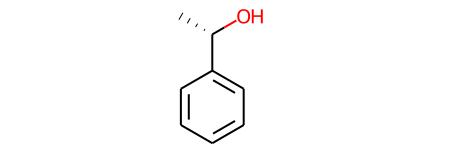

In [13]:
mol = Chem.MolFromMolFile("data/chiral.mol")
print(f"SMILES: {Chem.MolToSmiles(mol)}")
mol

In [14]:
def getAtomInfo(atom):
    print(f"""
    atom: {atom}
    map num: {atom.GetAtomMapNum()}
    atomic num: {atom.GetAtomicNum()}
    bonds: {atom.GetBonds()}
    formal charge: {atom.GetFormalCharge()}
    chiral tag: {atom.GetChiralTag()}
    degree: {atom.GetDegree()}
    is aromatic: {atom.GetIsAromatic()}
    index: {atom.GetIdx()}
    neighbours: {atom.GetNeighbors()}
    SMARTS: {atom.GetSmarts()}
    symbol: {atom.GetSymbol()}
    in ring: {atom.IsInRing()}
    in ring size of 6: {atom.IsInRingSize(6)}
    """)
for atom in mol.GetAtoms():
    getAtomInfo(atom)


    atom: <rdkit.Chem.rdchem.Atom object at 0x7fc3edd08d50>
    map num: 0
    atomic num: 6
    bonds: (<rdkit.Chem.rdchem.Bond object at 0x7fc3edd08d00>,)
    formal charge: 0
    chiral tag: CHI_UNSPECIFIED
    degree: 1
    is aromatic: False
    index: 0
    neighbours: (<rdkit.Chem.rdchem.Atom object at 0x7fc3edd08d00>,)
    SMARTS: C
    symbol: C
    in ring: False
    in ring size of 6: False
    

    atom: <rdkit.Chem.rdchem.Atom object at 0x7fc3edd08d00>
    map num: 0
    atomic num: 6
    bonds: (<rdkit.Chem.rdchem.Bond object at 0x7fc3edd08d50>, <rdkit.Chem.rdchem.Bond object at 0x7fc3edd08c60>, <rdkit.Chem.rdchem.Bond object at 0x7fc3edd08300>)
    formal charge: 0
    chiral tag: CHI_TETRAHEDRAL_CCW
    degree: 3
    is aromatic: False
    index: 1
    neighbours: (<rdkit.Chem.rdchem.Atom object at 0x7fc3edd08d50>, <rdkit.Chem.rdchem.Atom object at 0x7fc3edd08c60>, <rdkit.Chem.rdchem.Atom object at 0x7fc3edd08300>)
    SMARTS: [C@H]
    symbol: C
    in ring: False
  

### Get bonds in a molecule

* `GetBondWithIdx()`

In [15]:
smi = "CC(C)OC(=O)C(C)NP(=O)(OCC1C(C(C(O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3"
mol = Chem.MolFromSmiles(smi)
bond1 = mol.GetBondWithIdx(1)
bond1

## Get Bond Info

* `GetBondType()`
* `GetBeginAtom()`
* `GetBeginAtomIdx()`
* `GetEndAtom()`
* `GetEndAtomIdx()`
* `IsInRing()`
* `IsInRingSize()`

> Note: rdkit only count the small rings

For example, a molecule is built as the figure below, it contains a three-membered ring and a for-membered ring. 

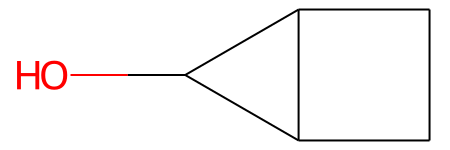

In [16]:
m = Chem.MolFromSmiles("OC1C2C1CC2")
m

In [17]:
atom2 = m.GetAtomWithIdx(2)
print(f"atom2 in ring: {atom2.IsInRing()}")
for i in range(3, 6):
    print(f"atom2 in {i}-ring: {atom2.IsInRingSize(i)}")

atom2 in ring: True
atom2 in 3-ring: True
atom2 in 4-ring: True
atom2 in 5-ring: False


### Get All Rings in a molecule

* `GetSymmSSSR()`
* `GetRingInfo()`

In [18]:
ssr = Chem.GetSymmSSSR(m)
num_ring = len(ssr)
print(f"num of ring: {num_ring}")
for ring in ssr:
    print(f"ring consisted of atoms id: {list(ring)}")

ringInfo = m.GetRingInfo()
print(type(ringInfo))

num of ring: 2
ring consisted of atoms id: [1, 2, 3]
ring consisted of atoms id: [4, 5, 2, 3]
<class 'rdkit.Chem.rdchem.RingInfo'>


### Molecule Object to Inchi String

* `Chem.inchi.MolToInchi()`

In [19]:
m = Chem.MolFromSmiles("OCCC")
inchi = Chem.inchi.MolToInchi(m)
inchi

'InChI=1S/C3H8O/c1-2-3-4/h4H,2-3H2,1H3'

## Modify Molecules

### Edit H Atom

1. `AddHs()`
2. `RemoveHs()`

In [20]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
m2 = Chem.AddHs(m)
def getSmilesAndNumAtoms(mol):
    print(f"SMILES: {Chem.MolToSmiles(mol)}\nnum atoms: {mol.GetNumAtoms()}")

SMILES: OC1C2CCC12
num atoms: 6


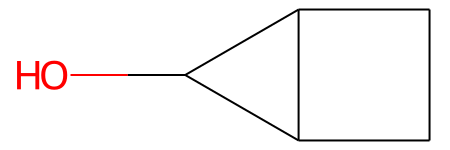

In [21]:
getSmilesAndNumAtoms(m)
m

SMILES: [H]OC1([H])C2([H])C([H])([H])C([H])([H])C12[H]
num atoms: 14


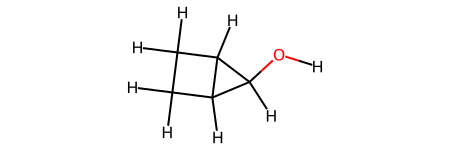

In [22]:
getSmilesAndNumAtoms(m2)
m2

### Aromatic Bonds and Single/Double Bonds

* `Chem.Kekulize()`
* `Chem.SanitizeMol()`

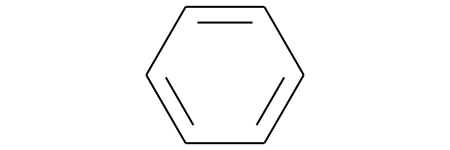

In [23]:
m = Chem.MolFromSmiles("c1ccccc1")
def printAllBondsType(mol):
    for bond in m.GetBonds():
        print(bond.GetBondType())
m

In [24]:
printAllBondsType(m)

AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC


In [25]:
Chem.Kekulize(m)
printAllBondsType(m)
print(f"bond 0 is aromatic: {m.GetBondWithIdx(0).GetIsAromatic()}")
print(f"atom 0 is aromatic: {m.GetAtomWithIdx(0).GetIsAromatic()}")

DOUBLE
SINGLE
DOUBLE
SINGLE
DOUBLE
SINGLE
bond 0 is aromatic: True
atom 0 is aromatic: True


In [26]:
# back to aromatic
Chem.SanitizeMol(m)
printAllBondsType(m)

AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC


## Working with 2D molecules: Description

### Compute 2D Coords

* `AllChem.Compute2DCoords()`

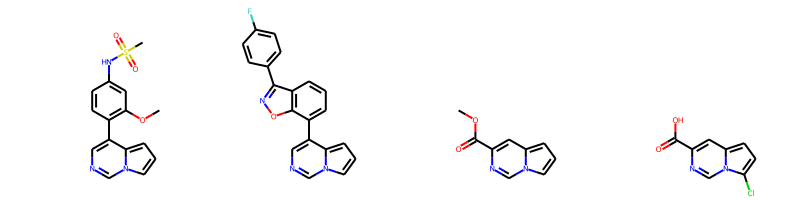

In [27]:
from rdkit.Chem import Draw
from rdkit import Chem

smis = [
    "COC1=C(C=CC(=C1)NS(=O)(=O)C)C2=CN=CN3C2=CC=C3",
    "C1=CC2=C(C(=C1)C3=CN=CN4C3=CC=C4)ON=C2C5=CC=C(C=C5)F",
    "COC(=O)C1=CC2=CC=CN2C=N1",
    "C1=C2C=C(N=CN2C(=C1)Cl)C(=O)O",
]
template = Chem.MolFromSmiles("c1nccc2n1ccc2")
AllChem.Compute2DCoords(template)
mols = []
for smi in smis:
    mol = Chem.MolFromSmiles(smi)
    AllChem.GenerateDepictionMatching2DStructure(mol, template)
    mols.append(mol)

img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=["" for x in mols])
img

## Working with 3D Molecules

> note: Ensure you have add H atoms before create 3D conformation.

* `AllChem.EmbedMolecule()`
* `AllChem.EmbedMultipleConfs()`
* `GetConformer()`
* `GetConformers()`

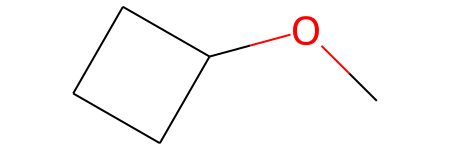

In [42]:
m = Chem.MolFromSmiles("C1CCC1OC")
AllChem.Compute2DCoords(m)
m

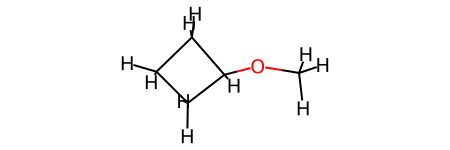

In [43]:
m2 = Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
m2